# Mini Project: Deep Learning with Keras

In this mini-project we'll be building a deep learning classifier using Keras to predict income from the popular [Adult Income dataset](http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html).

Predicting income from demographic and socio-economic information is an important task with real-world applications, such as financial planning, market research, and social policy analysis. The Adult dataset, sometimes referred to as the "Census Income" dataset, contains a vast amount of anonymized data on individuals, including features such as age, education, marital status, occupation, and more. Our objective is to leverage this data to train a deep learning model that can effectively predict whether an individual's income exceeds $50,000 annually or not.

Throughout this Colab, we will walk you through the entire process of building a deep learning classifier using Keras, a high-level neural network API that runs on top of TensorFlow. Keras is known for its user-friendly and intuitive interface, making it an excellent choice for both beginners and experienced deep learning practitioners.

Here's a brief outline of what we will cover in this mini-project:

1. **Data Preprocessing:** We will start by loading and exploring the Adult dataset.

2. **Building the Deep Learning Model:** We will construct a neural network using Keras, where we'll dive into understanding the key components of a neural network, including layers, activation functions, and optimization algorithms.

3. **Model Training:** With our model architecture in place, we will split the data into training and validation sets and train the neural network on the training data. We will monitor the training process to prevent overfitting and enhance generalization.

4. **Model Evaluation:** After training, we'll assess the performance of our model on the test dataset.

By the end of this tutorial, you will not only have a functional deep learning classifier for income prediction but also gain valuable insights into how to leverage the power of neural networks for solving real-world classification tasks.


In [3]:
!pip install scikeras

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
# from scikeras.wrappers.scikit_learn import KerasClassifier
from sklearn.pipeline import Pipeline

You can download the Adult data from the link [here](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data).

Here are your tasks:

  1. Load the Adult data into a Pandas Dataframe.
  2. Ensure the dataset has properly named columns. If the columns are not read in, assign them by referencing the dataset documentation.
  3. Display the first five rows of the dataset.

In [5]:
DATA_PATH = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

# Download the dataset and load it into a pandas DataFrame
# Feature (column names) from https://archive.ics.uci.edu/dataset/2/adult
df_adult_data = pd.read_csv(DATA_PATH, header=None,
                            names=['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status','occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income'])


In [6]:
# Display the first few rows of the DataFrame
df_adult_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


If you're not already familiar with the Adult dataset, it's important to do some exploratory data analysis.

Here are your tasks:

  1. Do exploratory data analysis to give you some better intuition for the dataset. This is a bit open-ended. How many rows/columns are there? How are NULL values represented? What's the percentage of positive cases in the dataset?

  2. Drop all rows with NULL values.

  3. Use Scikit-Learn's [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) to convert the `income` column with a data type string to a binary variable.

In [7]:
# Do some exploratory analysis.
# How many rows/columns are there?
print(f'Adult data has {df_adult_data.shape[0]} rows and {df_adult_data.shape[1]} columns')

Adult data has 32561 rows and 15 columns


In [8]:
df_adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
# How are NULL values represented?
df_adult_data.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


There are no 'NULL' values in the data loaded from DATA_PATH. As we will see later, there are entries with ' ?' representing missing data.  

In [10]:
# Check NA in data loaded from DATA_PATH
df_adult_data.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [11]:
!pip install ucimlrepo

In [12]:
# Loading data using ucimlrepo as mentioned in the https://archive.ics.uci.edu/dataset/2/adult
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

In [13]:
# Check for NA entries in the data loaded from ucimlrepo
X.isna().sum()

,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,0


In [14]:
X[X['native-country'] == 'Holand-Netherlands']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
19609,32,Private,27882,Some-college,10,Never-married,Machine-op-inspct,Other-relative,White,Female,0,2205,40,Holand-Netherlands


# Data Discrepancy in 'DATA_PATH' and ucimlrepo
- The data loaded from the 'DATA_PATH' provided (using read_csv) is different from the data loaded using ucimlrepo. There are 32561 number of rows in 'DATA_PATH' with some entries in 'workclass', 'occupation', 'native_country' with value ' ?'. On the other hand, the data loaded from ucimlrepo has 48842 number of rows with some missing value (i.e., NA).
- Use the data 'DATA_PATH' after cleaning (i.e., dropping the entries with ' ?' in any 'workclass', 'occupation', 'native_country' columns/features.

In [15]:
# Find all NULL values and drop them
# Find the unique values in 'workclass' column
df_adult_data['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [16]:
# Different value counts in 'workclass' column. There are 1836 entries with '?' value (missing data)
df_adult_data['workclass'].value_counts()

,count
workclass,
Private,22696
Self-emp-not-inc,2541
Local-gov,2093
?,1836
State-gov,1298
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
Never-worked,7


In [17]:
# Find the unique values in 'occupation' column
df_adult_data['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [18]:
# Find the unique values in 'native_country' column
df_adult_data['native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [19]:
# Number of entries with value ' ?' (There are 1843 rows of data with value ' ?')
df_adult_data[df_adult_data['occupation']==' ?'].count()

,0
age,1843
workclass,1843
fnlwgt,1843
education,1843
education_num,1843
marital_status,1843
occupation,1843
relationship,1843
race,1843
sex,1843


In [20]:
# Drop all the ' ?' values from df_adult_data and assign to df_adult_clean
df_adult_clean = df_adult_data.drop(df_adult_data[df_adult_data['occupation']==' ?'].index)

In [21]:
# Check if all the ' ?' values have been dropped in df_adult_clean
df_adult_clean[df_adult_clean['occupation']==' ?'].count()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [22]:
# Check the ' ?' values in column 'native_country' in df_adult_clean data frame
df_adult_clean[df_adult_clean['native_country']==' ?'].count()

,0
age,556
workclass,556
fnlwgt,556
education,556
education_num,556
marital_status,556
occupation,556
relationship,556
race,556
sex,556


In [23]:
# Drop all the ' ?' values in column 'native_country'
df_adult_clean = df_adult_clean.drop(df_adult_clean[df_adult_clean['native_country']==' ?'].index)

In [24]:
# Check if all the ' ?' values have been dropped in df_adult_clean
df_adult_clean[df_adult_clean['native_country']==' ?'].count()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [25]:
# Check the ' ?' values in column 'workclass' in df_adult_clean data frame
df_adult_clean[df_adult_clean['workclass']==' ?'].count()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [26]:
# As identified later, there is only one entry of 'native_country' = ' Holand-Netherlands' in the data set.
# Therefore, there is not enough data to train test split. As such, this entry be removed.
df_adult_clean[df_adult_clean['native_country']==' Holand-Netherlands'].count()

,0
age,1
workclass,1
fnlwgt,1
education,1
education_num,1
marital_status,1
occupation,1
relationship,1
race,1
sex,1


In [27]:
# Drop the ' Holand-Netherlands' entry in column 'native_country'
df_adult_clean_1 = df_adult_clean.drop(df_adult_clean[df_adult_clean['native_country']==' Holand-Netherlands'].index)

In [28]:
# Check if the ' Holand-Netherlands' entry has been dropped properly
df_adult_clean_1[df_adult_clean_1['native_country']==' Holand-Netherlands'].count()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [29]:
# Check the count of data grouped by 'native_country'. All entries have multiple data points.
df_adult_clean_1.groupby(['native_country']).count()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,income
native_country,,,,,,,,,,,,,,
Cambodia,18,18,18,18,18,18,18,18,18,18,18,18,18,18
Canada,107,107,107,107,107,107,107,107,107,107,107,107,107,107
China,68,68,68,68,68,68,68,68,68,68,68,68,68,68
Columbia,56,56,56,56,56,56,56,56,56,56,56,56,56,56
Cuba,92,92,92,92,92,92,92,92,92,92,92,92,92,92
Dominican-Republic,67,67,67,67,67,67,67,67,67,67,67,67,67,67
Ecuador,27,27,27,27,27,27,27,27,27,27,27,27,27,27
El-Salvador,100,100,100,100,100,100,100,100,100,100,100,100,100,100
England,86,86,86,86,86,86,86,86,86,86,86,86,86,86


In [30]:
# Separate the data for features and target
y_data = df_adult_clean_1['income']
X_data = df_adult_clean_1.drop(columns=['income'])

In [31]:
X_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [32]:
# What's the percentrage of positive cases in the dataset?
print(f'Percentage of people with salary {y_data.unique()[1]} is {((y_data == y_data.unique()[1]).sum()) / y_data.count() * 100}%')

Percentage of people with salary  >50K is 24.89307383707437%


In [33]:
# Use Scikit-Learn's LabelEncoder to convert the income column with a data type
# string to a binary variable.
label_enc = LabelEncoder()
label_enc.fit(y_data)
y_data_enc = label_enc.transform(y_data)

In [34]:
# See the encoded classes from Scikit learn LabelEncoder
label_enc.classes_

array([' <=50K', ' >50K'], dtype=object)

1. Split the data into training and test sets. Remember not to include the label you're trying to predict, `income`, as a column in your training data.

In [35]:
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data_enc, random_state=0, stratify=y_data_enc)
# X_train, X_test, y_train, y_test = train_test_split(X_data, y_data_enc, random_state=0, stratify=X_data['native_country']) # As only one entry for ' Holand-Netherlands', this cannot be performed
print(f'Size of train and test data: X_train size {X_train.shape}, X_test size {X_test.shape}, y_train size {y_train.shape}, y_test size {y_test.shape}')

Size of train and test data: X_train size (22620, 14), X_test size (7541, 14), y_train size (22620,), y_test size (7541,)


In [36]:
# Find train test data split in the same percentage as target
print(f'Percentage of people with salary in test data is {y_test.sum()/len(y_test) * 100}%')
print(f'Percentage of people with salary in train data is {y_train.sum()/len(y_train) * 100}%')

Percentage of people with salary in test data is 24.890598063917253%
Percentage of people with salary in train data is 24.893899204244033%


In machine learning, the Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (AUC) metric are commonly used to evaluate the performance of binary classification models. These are valuable tools for understanding how well a model can distinguish between the positive and negative classes in a classification problem.

Let's break down each concept:

1. ROC Curve:
The ROC curve is a graphical representation of a binary classifier's performance as the discrimination threshold is varied. It is created by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR) at different threshold values. Here's how these rates are calculated:

- True Positive Rate (TPR), also called Sensitivity or Recall, measures the proportion of actual positive instances that are correctly identified by the model:
   TPR = True Positives / (True Positives + False Negatives)

- False Positive Rate (FPR) measures the proportion of actual negative instances that are incorrectly classified as positive by the model:
   FPR = False Positives / (False Positives + True Negatives)

The ROC curve is useful because it shows how well a classifier can trade off between sensitivity and specificity across different threshold values. The ideal ROC curve hugs the top-left corner, indicating a high TPR and low FPR, meaning the classifier is excellent at distinguishing between the two classes.

2. AUC (Area Under the Curve):
The AUC is a scalar metric derived from the ROC curve. It represents the area under the ROC curve, hence its name. The AUC ranges from 0 to 1, where 0 indicates a very poor classifier (always predicting the opposite class) and 1 signifies a perfect classifier (making all correct predictions).

The AUC metric is beneficial because it provides a single value to summarize the classifier's overall performance across all possible threshold values. It is particularly useful when dealing with imbalanced datasets, where one class significantly outnumbers the other. In such cases, accuracy alone might not be a reliable evaluation metric, and AUC can provide a more robust performance measure.

A quick rule of thumb for interpreting AUC values:
- AUC ≈ 0.5: The model performs no better than random guessing.
- 0.5 < AUC < 0.7: The model has poor to fair performance.
- 0.7 < AUC < 0.9: The model has good to excellent performance.
- AUC ≈ 1: The model is close to or has a perfect performance.

Here are your tasks:

  1. Use Scikit-Learn's [roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) to calculate the AUC score for a method that always predicts the majority class.  

In [37]:
# Use Scikit-Learn's roc_auc_score to calculate the AUC score for a method that always predicts the majority class.
# As the 1s and 0s are the values in the numpy array, sum of all values is greater than half of the length can be considered majority
majority = sum(y_test) > len(y_test)/2
roc_auc_score(y_test, majority * np.ones(y_test.shape))

0.5

Now, let's do a little feature engineering.

1. Use Scikit-Learn's [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html) to apply One Hot Encoding to the categorical variables in `workclass`, `education`, `marital-status`, `occupation`, `relationship`, 'race', `sex`, and `native-country`. Also, apply [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) to the remaining continuous features. How many columns will the dataframe have after these columns transformations are applied?

In [38]:
X_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [39]:
# Use Scikit-Learn's ColumnTransformer to apply One Hot Encoding to the categorical variables in workclass, education, marital-status, occupation, relationship, 'race', sex, and native-country. Also, apply MinMaxScaler to the remaining continuous features.
# Categorical features are 'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'
categorical_features = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']
# Numerical features are 'age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week'
numerical_features = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
# Use Scikit-Learn's ColumnTransformer to preprocess the categorical and continuous features independently.
# Define the transformer for categorical features and numerical features
t_cat_num = [('cat_enc', OneHotEncoder(), categorical_features),
             ('num_enc', MinMaxScaler(), numerical_features)]
# Apply the column transformer (There are no remaining features to pass through)
transformer_cat_num = ColumnTransformer(transformers=t_cat_num, remainder='passthrough')
# Apply the transformer for the selected categorical features
X_train_transformed = transformer_cat_num.fit_transform(X_train)

In [40]:
type(X_train_transformed)

scipy.sparse._csr.csr_matrix

In [41]:
# Print and see the values of the transformed data
X_train_transformed

<22620x103 sparse matrix of type '<class 'numpy.float64'>'
	with 274146 stored elements in Compressed Sparse Row format>

In [42]:
# Print the transformed feature list
transformer_cat_num.get_feature_names_out()

array(['cat_enc__workclass_ Federal-gov', 'cat_enc__workclass_ Local-gov',
       'cat_enc__workclass_ Private', 'cat_enc__workclass_ Self-emp-inc',
       'cat_enc__workclass_ Self-emp-not-inc',
       'cat_enc__workclass_ State-gov', 'cat_enc__workclass_ Without-pay',
       'cat_enc__education_ 10th', 'cat_enc__education_ 11th',
       'cat_enc__education_ 12th', 'cat_enc__education_ 1st-4th',
       'cat_enc__education_ 5th-6th', 'cat_enc__education_ 7th-8th',
       'cat_enc__education_ 9th', 'cat_enc__education_ Assoc-acdm',
       'cat_enc__education_ Assoc-voc', 'cat_enc__education_ Bachelors',
       'cat_enc__education_ Doctorate', 'cat_enc__education_ HS-grad',
       'cat_enc__education_ Masters', 'cat_enc__education_ Preschool',
       'cat_enc__education_ Prof-school',
       'cat_enc__education_ Some-college',
       'cat_enc__marital_status_ Divorced',
       'cat_enc__marital_status_ Married-AF-spouse',
       'cat_enc__marital_status_ Married-civ-spouse',
       'cat_

In [43]:
# See a small portion of sparse matrix
X_train_tran_dense = X_train_transformed.todense()
X_train_tran_dense[0,:]

matrix([[0.        , 0.        , 1.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 1.        , 0.        , 0.        ,
         0.        , 0.        , 1.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 1.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 1.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 1.        ,
         1.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0

In [44]:
# How many columns will the dataframe have after these columns transformations are applied?
print(f'Number of columns after the transformation is {len(transformer_cat_num.get_feature_names_out().tolist())}')

Number of columns after the transformation is 103


Keras is an open-source deep learning library written in Python. It was developed to provide a user-friendly, high-level interface for building and training neural networks. The library was created by François Chollet and was first released in March 2015 as part of the Deeplearning4j project. Later, it became part of the TensorFlow ecosystem and is now the official high-level API for TensorFlow.

Keras is designed to be modular, user-friendly, and easy to extend. It allows researchers and developers to quickly prototype and experiment with various deep learning models. One of the primary goals of Keras is to enable fast experimentation, making it simple to build and iterate on different architectures.

Key features of Keras include:

1. User-friendly API: Keras provides a simple and intuitive interface for defining and training deep learning models. Its design philosophy focuses on ease of use and clarity of code.

2. Modularity: Models in Keras are built as a sequence of layers, and users can easily stack, merge, or create complex architectures using a wide range of predefined layers.

3. Extensibility: Keras allows users to define custom layers, loss functions, and metrics. This flexibility enables researchers to experiment with new ideas and algorithms seamlessly.

4. Backends: Initially, Keras supported multiple backends, including TensorFlow, Theano, and CNTK. However, as of TensorFlow version 2.0, TensorFlow has become the primary backend for Keras.

5. Multi-GPU and distributed training: Keras supports training models on multiple GPUs and in distributed computing environments, making it suitable for large-scale experiments.

6. Pre-trained models: Keras includes a collection of pre-trained models for common tasks, such as image classification (e.g., VGG, ResNet, MobileNet) and natural language processing (e.g., Word2Vec, GloVe).

The integration of Keras into TensorFlow as its official high-level API has solidified its position as one of the most popular deep learning libraries in the machine learning community. Its ease of use and versatility have contributed to its widespread adoption in both academia and industry for a wide range of deep learning tasks.

Here are your tasks:

1. Create your own model in Keras to predict income in the Adult training data. Remember, it's always better to start simple and add complexity to the model if necessary. What's a good loss function to use?

2. Keras can be integrated with Scitkit-Learn using a wrapper. Use the [KerasClassifier wrapper](https://adriangb.com/scikeras/stable/generated/scikeras.wrappers.KerasClassifier.html) to integrate your Keras model with the ColumnTransformer from previous steps using a [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) object.

3. Fit your model.

4. Calculate the AUC score of your model on the test data. Does the model predict better than random?

5. Generate an ROC curve for your model using [RocCurveDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html). What would the curve look like if all your predictions were randomly generated? What would the curve look like if it you had a perfect model?

In [45]:
# Define the Keras model
# Create a sequential model
model = Sequential()
# Add a dense layer with 103 inputs (feature length) and 1 output (classification of <=50K or >50K) with sigmoid activation
model.add(Dense(1, input_shape=(103,), activation='sigmoid'))
# Compile your model (stochastic gradient descent as the number of samples are large, binary_crossentropy as the loss function, accuracy as the metric as it is simple)
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [87]:
# Create a Keras classifier
clf_model = KerasClassifier(model=model, epochs=200, batch_size=100, verbose=1)

In [88]:
# Create the scikit-learn pipeline
# The pipeline applies ColumnTransformer and LinearRegression
# The transformer_cat_num applies the ColumnTransformer (for the selected categorical features and selected numerical features as described above)
pipeline = Pipeline(steps=[('data_prep', transformer_cat_num), ('model', clf_model)])

In [89]:
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

Epoch 1/200
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8337 - loss: 0.3594
Epoch 2/200
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8293 - loss: 0.3643
Epoch 3/200
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8271 - loss: 0.3687
Epoch 4/200
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8296 - loss: 0.3643
Epoch 5/200
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8318 - loss: 0.3643
Epoch 6/200
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8291 - loss: 0.3635
Epoch 7/200
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8308 - loss: 0.3686
Epoch 8/200
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8328 - loss: 0.3593
Epoch 9/200
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8273 - loss: 0.3669
Epoch 10/200
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8292 - loss: 0.3636
Epoch 11/200
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8324 - loss: 0.3619
Epoch 12/200
227/227 ━━━━━━━━━━━━━━━━━━━━

Pipeline(steps=[('data_prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_enc', OneHotEncoder(),
                                                  ['workclass', 'education',
                                                   'marital_status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native_country']),
                                                 ('num_enc', MinMaxScaler(),
                                                  ['age', 'fnlwgt',
                                                   'education_num',
                                                   'capital_gain',
                                                   'capital_loss',
                                                   'hours_per_week'])])),
                ('model',
                 KerasClassifier(batch_size=100, epochs=200, model=<Sequential name=sequential, built=True>))])

In [90]:
# Calculate the AUC score of your model on the training data.
print(f'AUC score of your model on the training data {roc_auc_score(y_train, pipeline.predict(X_train))}')

227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
AUC score of your model on the training data 0.7450202900099607


In [91]:
# Calculate the AUC score of your model on the test data.
print(f'AUC score of your model on the training data {roc_auc_score(y_test, pipeline.predict(X_test))}')

76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
AUC score of your model on the training data 0.7422614089227612


# Model performance
- Does the model predict better than random? Yes. As compared to majority rule based classifier, trained neural network performs better (achieving a fair performance)

In [92]:
# Check the 'native_country' feature set of categorical values. This was used when transformation failed as only one entry for  ' Holand-Netherlands'
X_test['native_country'].unique()

array([' Germany', ' United-States', ' Portugal', ' Mexico', ' Japan',
       ' Puerto-Rico', ' Poland', ' Vietnam', ' Cuba', ' Columbia',
       ' Nicaragua', ' Hungary', ' India', ' Cambodia', ' Taiwan',
       ' Italy', ' Laos', ' Canada', ' Philippines', ' Jamaica',
       ' Honduras', ' El-Salvador', ' England', ' Haiti', ' Iran',
       ' Guatemala', ' South', ' Trinadad&Tobago', ' China',
       ' Dominican-Republic', ' Peru', ' Ecuador',
       ' Outlying-US(Guam-USVI-etc)', ' Ireland', ' Greece', ' France',
       ' Thailand', ' Scotland', ' Yugoslavia', ' Hong'], dtype=object)

In [52]:
# Check the 'native_country' feature set of categorical values. This was used when transformation failed as only one entry for  ' Holand-Netherlands'
X_train['native_country'].unique()

array([' United-States', ' Mexico', ' Ecuador', ' China', ' Philippines',
       ' Ireland', ' El-Salvador', ' Italy', ' Columbia', ' Germany',
       ' Yugoslavia', ' Cuba', ' Greece', ' India', ' Taiwan', ' South',
       ' Haiti', ' Vietnam', ' Jamaica', ' Canada', ' Hong', ' Guatemala',
       ' Poland', ' Scotland', ' Iran', ' Puerto-Rico', ' Cambodia',
       ' Dominican-Republic', ' Peru', ' Japan', ' England', ' Nicaragua',
       ' Honduras', ' Portugal', ' Laos', ' Trinadad&Tobago', ' Thailand',
       ' Hungary', ' France', ' Outlying-US(Guam-USVI-etc)'], dtype=object)

In [53]:
# Check the 'native_country' feature set of categorical values. This was used when transformation failed as only one entry for  ' Holand-Netherlands'
X_data[X_data['native_country'] == ' Holand-Netherlands']

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


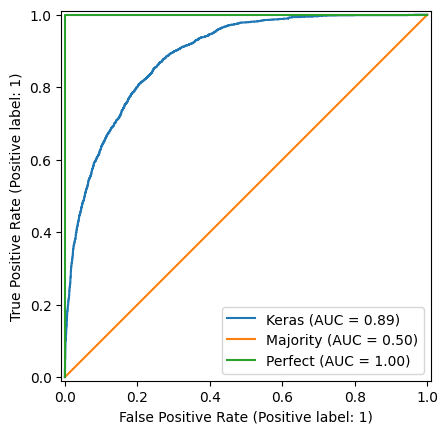

In [93]:
# Generate an ROC curve for your model.
import matplotlib.pyplot as plt
ax = plt.axes()
RocCurveDisplay.from_estimator(pipeline, X_test, y_test, ax=ax, name='Keras')
RocCurveDisplay.from_predictions(y_test, majority * np.ones(y_test.shape), ax=ax, name='Majority')
RocCurveDisplay.from_predictions(y_test, y_test, ax=ax, name='Perfect')
plt.show()

76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


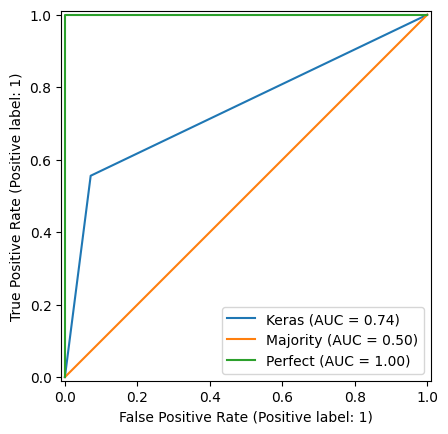

In [94]:
# Generate an ROC curve for your model.
import matplotlib.pyplot as plt
ax = plt.axes()
RocCurveDisplay.from_predictions(y_test, pipeline.predict(X_test), ax=ax, name='Keras')
RocCurveDisplay.from_predictions(y_test, majority * np.ones(y_test.shape), ax=ax, name='Majority')
RocCurveDisplay.from_predictions(y_test, y_test, ax=ax, name='Perfect')
plt.show()

In [55]:
accuracy = pipeline.score(X_test, y_test)
# Print accuracy
print('Accuracy:', accuracy)


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.8318525394510012


In [56]:
pred = pipeline.predict(X_test)

76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [63]:
out = model.layers[0].output

In [64]:
weights = model.layers[0].get_weights()

In [75]:
print(f'Layer 0 has {len(weights[0])} weights and bias {len(weights[1])}')
print('Weights', weights[0])
print('Bias', weights[1])

Layer 0 has 103 weights and bias 1
Weights [[ 0.25558317]
 [-0.33575788]
 [-0.2319022 ]
 [ 0.18806218]
 [-0.56064695]
 [-0.3350856 ]
 [ 0.20761941]
 [-0.3976154 ]
 [-0.52555215]
 [-0.27406058]
 [ 0.03832754]
 [-0.3881356 ]
 [-0.68387944]
 [-0.27170056]
 [-0.1202585 ]
 [-0.04698171]
 [ 0.4024531 ]
 [ 0.59708387]
 [-0.48635274]
 [ 0.7251354 ]
 [ 0.1246181 ]
 [ 0.66043305]
 [-0.19610117]
 [-0.30476063]
 [-0.09020166]
 [ 0.8881206 ]
 [-0.15024866]
 [-1.0878696 ]
 [-0.225364  ]
 [-0.22701031]
 [-0.16153617]
 [-0.05671853]
 [-0.20469368]
 [ 0.7182421 ]
 [-0.6758777 ]
 [-0.63624024]
 [-0.6264237 ]
 [-0.9515532 ]
 [-0.0384254 ]
 [ 0.53607583]
 [ 0.17022519]
 [ 0.17922767]
 [ 0.2731345 ]
 [-0.2698103 ]
 [ 0.19710635]
 [-0.16112328]
 [-0.318943  ]
 [-0.9060987 ]
 [-0.5127535 ]
 [ 0.84925586]
 [-0.29795176]
 [-0.2991926 ]
 [-0.52178574]
 [-0.1718245 ]
 [-0.31677887]
 [-0.69480866]
 [-0.18006511]
 [-0.1216308 ]
 [ 0.11758027]
 [-0.08547875]
 [-0.2913267 ]
 [-0.12392181]
 [-0.28449154]
 [-0.0226414

# Discussion
-**Data**: The input data has been cleaned through EDA process. Speciafically, there were entries with value ' ?'. These entries have been removed. There is only one entry of 'native_country' column categorical data for category ' Holand-Netherlands'. As there is not enough data points for train test split, this row has been removed. There are 30161 rows of data in 14 features (both numerical and categorical). Categorical data is encoded by onehotencoding and numerical data is scaled by minmax scaler. After column transformation of   categorical data, there are 103 input features. Training data set size is 22620 and the test data size is 7541.   

-**Model**: A keras classifier is trained for binary cross entropy as the loss function. The model consist of one dense layer of the size of input (103) nurons and one output. Sigmoid activation is used with accuracy as the metric.

-**Performance**: The ROC analysis shows that the proposed classifier achieves 0.89 AUC which is excellent (0.7 < AUC < 0.9: The model has good to excellent performance). Given that model is very simple (one layer) without any parameter optimizations, the performance is remarkable.

-**Further improvements**: In order to achieve better performance, further parameter optimization can be done (eg. RandomizedSearchCV). Provided that the model is implemented as pipeline, this can be done in an straightforward manner. The parameter optimization can consider different parameters such as epochs, batch sizes, activation, loss functions etc. Moreover, provided that the proposed simple model is achieving a good-to-excellent performance in terms of AUC, a sophisticated network may be tried taking this simple model as a baseline for comparison for model complexity (computation, memory etc) and the performance.  